In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import sklearn
import sys
from sklearn.linear_model import (LinearRegression, Ridge, Lasso,LogisticRegression, LassoCV)
from sklearn.model_selection import (KFold, cross_val_score, train_test_split, cross_validate)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import (Pipeline, make_pipeline)
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.tree import DecisionTreeClassifier

cancer = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)
print(scores)
print(np.mean(scores))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937
[0.90434783 0.92173913 0.91150442 0.94690265 0.90265487]
0.9174297806848788


In [5]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
scores = cross_val_score(gbrt, cancer.data, cancer.target, cv=5)
print(scores)
print(np.mean(scores))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
[0.93043478 0.93913043 0.97345133 0.98230088 0.98230088]
0.9615236629472873


In [6]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
scores = cross_val_score(gbrt, cancer.data, cancer.target, cv=5)
print(scores)
print(np.mean(scores))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972
[0.93913043 0.94782609 0.99115044 0.96460177 0.97345133]
0.9632320123124278


In [21]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

scores = cross_val_score(gbrt, cancer.data, cancer.target, cv=5)
print(scores)
print(np.mean(scores))

훈련 세트 정확도: 0.988
훈련 세트 정확도: 0.965
[0.93913043 0.92173913 0.95575221 0.94690265 0.94690265]
0.9420854174682571


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


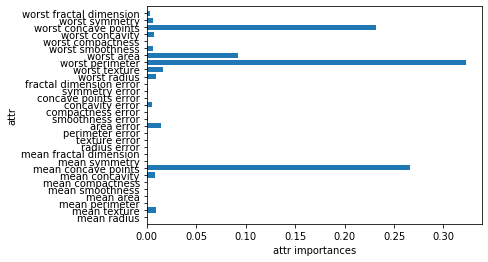

In [7]:
import mglearn
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

# 특성 중요도 시각화 하기

def plot_feature_importances_cancer(model):

    n_features = cancer.data.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), cancer.feature_names)

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

    plt.show()

plot_feature_importances_cancer(gbrt)

In [8]:
import pandas
# from sklearn import cross_validation
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
X = cancer.data
Y = cancer.target
num_folds = 10
num_instances = len(X)
seed = 7
num_trees = 100
kfold = cross_validate.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_validate.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

AttributeError: 'function' object has no attribute 'KFold'

In [9]:
import time
from sklearn import preprocessing
train = pd.read_csv('./weatherAUS.csv')
train=train.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date'],axis=1)

for col in train.columns:
    temp=train.shape[0]
    train = train[pd.notnull(train[col])]
train['RainTodayBool'] = train['RainToday'].map( {'No': 0, 'Yes':1} ).astype(int)
train=pd.get_dummies(train,columns=['WindGustDir','WindDir9am','WindDir3pm'])
y=train['RainTomorrow'].map({'No':0, 'Yes':1}).astype(int)
train = train.drop([    'RainTomorrow','RainToday'],axis=1)



scaler = preprocessing.MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(scaler.transform(train), index=train.index, columns=train.columns)

#train=train[['Rainfall', 'Humidity9am', 'Humidity3pm', 'RainTodayBool', 'WindDir9am_N']] 

ready=train
print(ready.shape)
t0=time.time()
#gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1,min_samples_split=5, n_estimators=100 )

scores = cross_val_score(gbrt, train, y, cv=10)
t1=time.time()
print('Time taken : ', t1-t0)
print(scores)
print(np.mean(scores))

###############
train=ready
t0=time.time()
#gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, n_estimators=100 )
#gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
scores = cross_val_score(gbrt, train, y, cv=10)
t1=time.time()
print('Without Depth Time taken : ', t1-t0)
print(scores)
print(np.mean(scores))
######
ready=train
t0=time.time()
clf_logreg=LogisticRegression(random_state=0,max_iter=1000,solver="liblinear")
scores = cross_val_score(clf_logreg, train, y, cv=10)
t1=time.time()
print('Logistic Time taken : ', t1-t0)
print(scores)
print(np.mean(scores))



(112925, 61)
Time taken :  46.701026916503906
[0.84671921 0.83485345 0.83379084 0.84158328 0.84698486 0.84450545
 0.84174637 0.85379029 0.84564293 0.85413161]
0.8443748290340446


KeyboardInterrupt: 